In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [46]:
df = pd.read_csv(r'../data/comparison_all.csv')
df['pro_score'] = np.abs(df['pro_score'])
df['diff'] = df['fragility1']-df['fragility2']

In [47]:
df_top = df.sort_values('pro_score',ascending=True).head(5)

In [48]:
def GroupIt(df):
    fragility = np.hstack((df['fragility1'],df['fragility2']))
    EPI = np.hstack((df['EPI1'],df['EPI2']))
    FSI = np.hstack((df['FSI1'],df['FSI2']))
    group = np.hstack((['treated']*len(df['EPI1']), 
                  ['untreated']*len(df['EPI2'])))
    country = np.hstack((df['country1'],df['country1']))
    

    df_grouped = pd.DataFrame(data={
        'EPI':EPI,
        'FSI':FSI,
        'Group':group,
        'Fragility':fragility,
        'Country': country
    })
    return df_grouped

In [49]:

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("GnBu", 3).as_hex())
rcmap = ListedColormap(sns.color_palette("GnBu_r", 3).as_hex())

In [50]:
df_grouped = GroupIt(df)

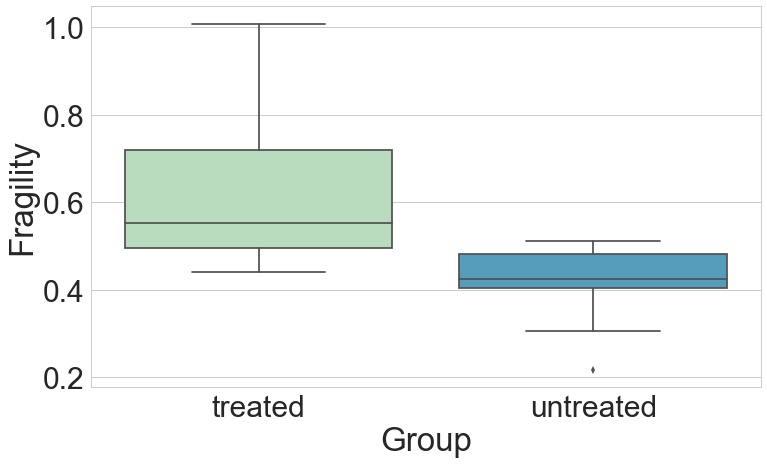

In [83]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid", font_scale=3)
ax = sns.boxplot(x="Group", y='Fragility', data=df_grouped, palette="GnBu")
plt.savefig('../Paper/figs/fragility_treat.pdf',bbox_inches='tight')
plt.show()

In [77]:
df_top = df.sort_values('pro_score',ascending=True).head(8)
df_top['fragility1'] = df_top['fragility2']
df_top['fragility2'] = df_top['diff']
df_top_grouped = GroupIt(df_top)

In [78]:
df_top_grouped

,Country,EPI,FSI,Fragility,Group
0,Iran2014,64.82,87.2,0.420020,treated
1,Ghana2008,54.66,64.6,0.217833,treated
2,India2013,53.74,77.5,0.378641,treated
3,Bhutan2012,61.84,82.4,0.447629,treated
4,Uzbekistan2015,64.88,85.3,0.407984,treated
5,Ecuador2009,68.08,81.2,0.447629,treated
6,Mali2007,38.32,75.5,0.506500,treated
7,Russia2016,83.52,81.0,0.512236,treated
8,Iran2014,63.33,79.2,0.215301,untreated
9,Ghana2008,76.46,67.4,0.469167,untreated


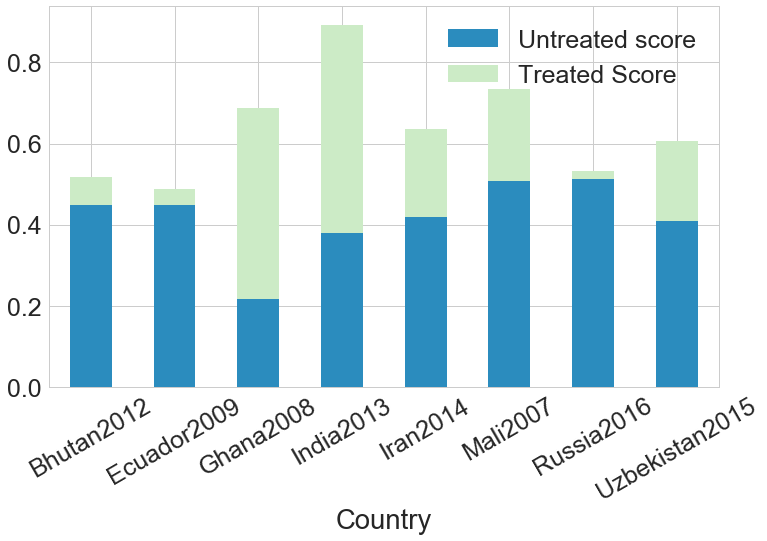

In [85]:
sns.set(style='whitegrid',font_scale=2.5)
df_top_grouped.pivot('Country','Group')['Fragility'].plot(figsize=(12,7),kind='bar',stacked='True', colormap=rcmap, rot=30)
plt.legend(['Untreated score','Treated Score'],fancybox=True, framealpha=1,shadow=True)
plt.savefig('../Paper/figs/compare_score.pdf',bbox_inches='tight')
plt.show()

In [80]:
pivoted = df_top_grouped.pivot('Country','Group')
pivoted.loc['Fragility','treated'] = df_top['diff']

In [89]:
df_frag = pd.read_csv('../Data/fragile.csv')
df_frag.head(3)

,Unnamed: 0,EPI,FSI,country,fragile
0,0,37.74,107.3,Afghanistan,0.966531
1,1,65.46,60.5,Albania,0.582212
2,2,57.18,76.8,Algeria,0.895586


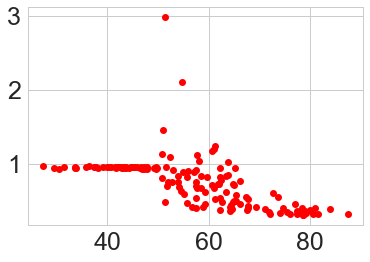

In [91]:
plt.plot(df_frag['EPI'],df_frag['fragile'],'ro')
plt.show()